## ENPM808W: Homework 1 - Question 2
#### Submitted by: Gauhar Bains

## Craft Beers Dataset  

#### Context
This dataset contains a list of 2,410 US craft beers and 510 US breweries. The beers and breweries are linked together by the "id". This data was collected in January 2017 from CraftCans.com. The dataset is an a tidy format and values have been cleaned up for your enjoyment.

#### Content
beers.csv - Contains data on 2000+ craft canned beers
breweries.csv - Contains data for 500+ breweries in the United States

#### Link to Data : https://www.kaggle.com/nickhould/craft-cans 


In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns

In [2]:
# path to data
cwd = os.getcwd()
Data_dir = os.path.join(cwd, 'Beer_Dataset')

## 1. Load Beer data

In [3]:
beers = pd.read_csv(os.path.join(Data_dir, 'beers.csv'))
beers = beers.drop('Unnamed: 0', axis=1)
beers.head(7)

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
5,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0
6,0.045,NaN,2260,Lake Street Express,American Pale Ale (APA),177,12.0


## 2. Load Breweries data

In [4]:
breweries = pd.read_csv(os.path.join(Data_dir, 'breweries.csv'))
breweries = breweries.drop('Unnamed: 0', axis=1)
breweries.head(7)

,name,city,state
0,NorthGate Brewing,Minneapolis,MN
1,Against the Grain Brewery,Louisville,KY
2,Jack's Abby Craft Lagers,Framingham,MA
3,Mike Hess Brewing Company,San Diego,CA
4,Fort Point Beer Company,San Francisco,CA
5,COAST Brewing Company,Charleston,SC
6,Great Divide Brewing Company,Denver,CO


### Number of breweries per state

* We can see that Colorado has the most number of breweries followed by California and Michigan

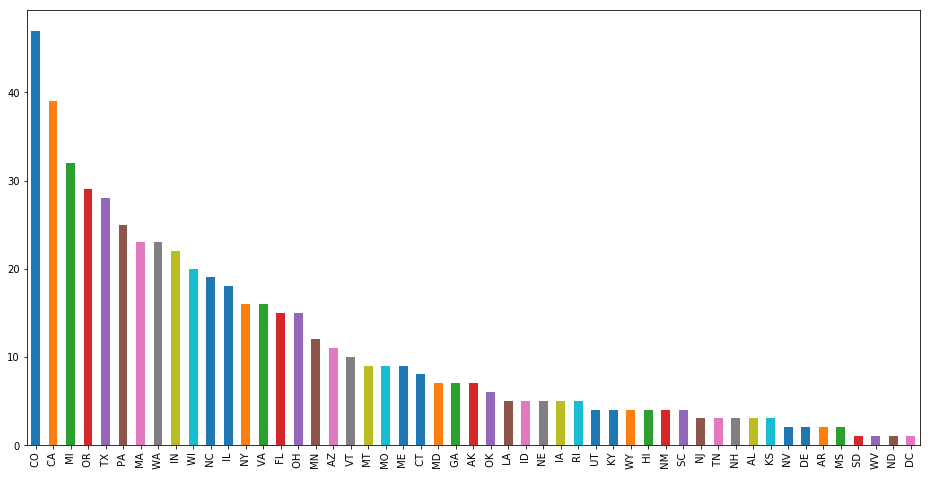

In [5]:
breweries['state'].value_counts().plot(kind = "bar", figsize=(16,8))


## 3. Merge Breweries and Beer data

I want to merge both data based on the brewery id as that is the category linking them. 

In [6]:
breweries["brewery_id"] = breweries.index 
df = beers.merge(breweries, on="brewery_id")

In [7]:
df.head()

,abv,ibu,id,name_x,style,brewery_id,ounces,name_y,city,state
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN


## Plot of types of beers by count

We can see than American IPA is the most commonly brewed beer type. 

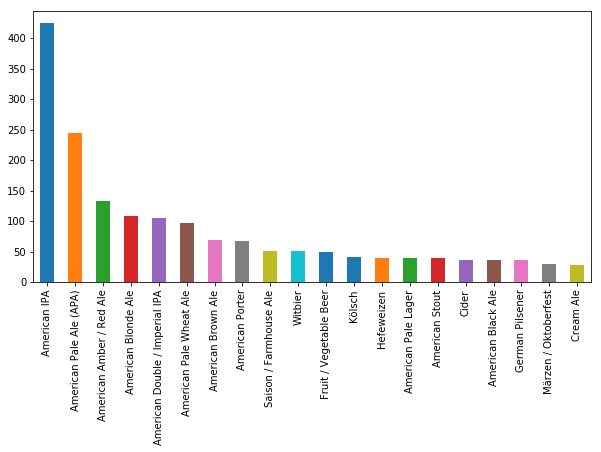

In [8]:
#df['style'].value_counts().plot(kind = "bar", figsize=(25,8), logy=True)
df['style'].value_counts()[:20].plot(kind = "bar", figsize=(10,5))

In [9]:
df.describe()

,abv,ibu,id,brewery_id,ounces
count,2348.000000,1405.000000,2410.000000,2410.000000,2410.000000
mean,0.059773,42.713167,1431.113278,231.749793,13.592241
std,0.013542,25.954066,752.459975,157.685604,2.352204
min,0.001000,4.000000,1.000000,0.000000,8.400000
25%,0.050000,21.000000,808.250000,93.000000,12.000000
50%,0.056000,35.000000,1453.500000,205.000000,12.000000
75%,0.067000,64.000000,2075.750000,366.000000,16.000000
max,0.128000,138.000000,2692.000000,557.000000,32.000000


## Distribution of Alcohol by Volume

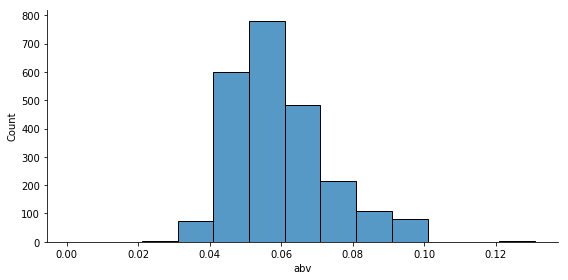

In [10]:
ax2 = sns.displot(df, x="abv", binwidth=0.01, height = 4, aspect = 2)

## Bitterness vs Alcohol Content

* As it can be seen in the plot below -- there seems to be a positive linear correalation between bitterness and alcohol. 


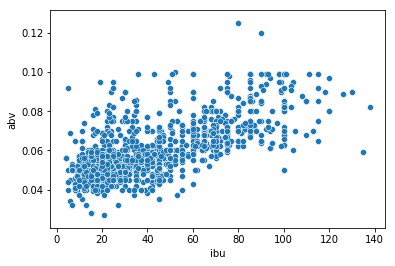

In [11]:
#ax2 = sns.displot(df.dropna(), x="ibu", binwidth=0.01, height = 4, aspect = 2)
sns.scatterplot(x="ibu",y="abv", data=df.dropna())

## Median Alcohol by Volume per state

* The plot below shows the median alcohol content in each state. It can be seen that almost all states have a median value between 5-6%. 

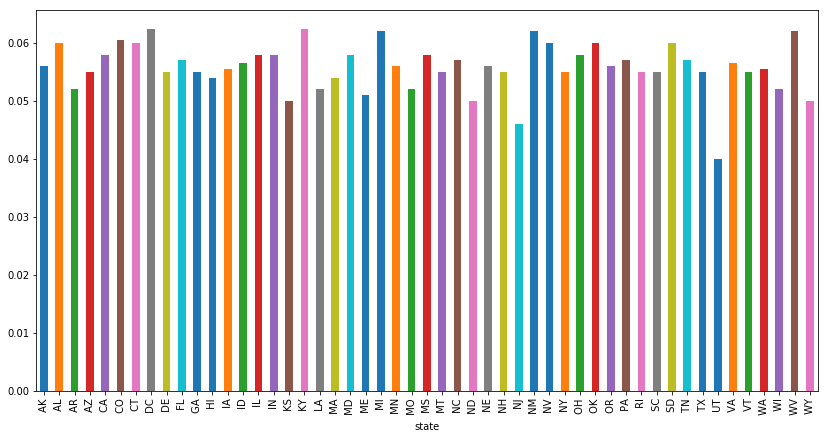

In [12]:
a = df.groupby('state')['abv'].median()
a.plot.bar(figsize=(14,7))

## Median bitterness index per state

*  The plot below shows the median bitterness index in each state. It can be seen that Maine and West Virginia has themost bitter beer, 

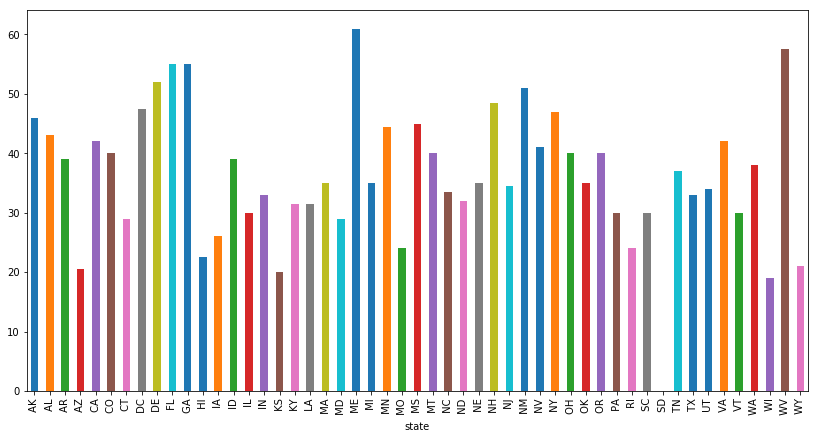

In [13]:
a = df.groupby('state')['ibu'].median()
a.plot.bar(figsize=(14,7))

##  Pre processing on the data

* The data consisted of 2 csv files as shown above. To make sense of the data first I needed to merge both these csv files into 1. 
* Both the files are linked with each other using a brrewery ID. The brewery ID was used to merge the data. 
* THe ibu column consists of missing data. To accomodate this, all the rows that consited of missing values were removed. 

## Results

* Coloardo seems to have the most number of breweries followed by California and Michigan.
* The most commom type of beer brewed is the American IPA (Indian Pale Ale). Out of the top 25 beers brewed 11 are Ales.
* The distribution of Alcohol by volume is shown above. Around 90% of the beers have Alcohol content within the range of 4-6%. 
* The median alcohol content in each state is consisted at around 5.5%.
* There is greater variation in the bitterness content in each state. Maine has the most bitter beer followed by West Virginia. Beer in Wisconsin, Kansas and Arizona is the least bitter.


